Visualization of both data


In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Reading the data files
air_quality_data = pd.read_csv('Air_Quality_20241104.csv')
tree_data = pd.read_csv('tree_data.csv')  # Replace with the actual path to the tree data file

# Displaying the raw data
print("Air Quality Data Head:")
print(air_quality_data.head())
print("\nAir Quality Data Columns:")
print(air_quality_data.columns)
air_quality_data.shape
tree_data.shape
print("\nTree Data Head:")
print(tree_data.head())
print("\nTree Data Columns:")
print(tree_data.columns)

Air Quality Data Head:
   Unique ID  Indicator ID                                   Name  \
0     179772           640  Boiler Emissions- Total SO2 Emissions   
1     179785           640  Boiler Emissions- Total SO2 Emissions   
2     178540           365                Fine particles (PM 2.5)   
3     178561           365                Fine particles (PM 2.5)   
4     823217           365                Fine particles (PM 2.5)   

          Measure Measure Info Geo Type Name  Geo Join ID  \
0  Number per km2       number         UHF42        409.0   
1  Number per km2       number         UHF42        209.0   
2            Mean       mcg/m3         UHF42        209.0   
3            Mean       mcg/m3         UHF42        409.0   
4            Mean       mcg/m3         UHF42        409.0   

            Geo Place Name          Time Period  Start_Date  Data Value  \
0         Southeast Queens                 2015  01/01/2015         0.3   
1  Bensonhurst - Bay Ridge                 20

In [2]:
# Filter datasets to include only matching geographic areas
common_geo_places = set(air_quality_data['Geo Place Name']).intersection(set(tree_data['zip_city']))

filtered_air_quality_data = air_quality_data[air_quality_data['Geo Place Name'].isin(common_geo_places)]
filtered_tree_data = tree_data[tree_data['zip_city'].isin(common_geo_places)]

# Select only relevant columns to reduce dimensions
filtered_air_quality_data = filtered_air_quality_data[['Geo Place Name', 'Name', 'Data Value']]
filtered_tree_data = filtered_tree_data[['zip_city', 'tree_id', 'tree_dbh', 'health', 'latitude', 'longitude']]

print("\nFiltered Air Quality Data Shape:", filtered_air_quality_data.shape)
print("Filtered Tree Data Shape:", filtered_tree_data.shape)

# Merge the filtered datasets
merged_data = pd.merge(
    filtered_tree_data,
    filtered_air_quality_data,
    left_on='zip_city',
    right_on='Geo Place Name',
    how='left'
)

print("Merged Data Shape:", merged_data.shape)


Filtered Air Quality Data Shape: (949, 3)
Filtered Tree Data Shape: (404290, 6)
Merged Data Shape: (71306072, 9)


# **Instruction for interpreting the heatmap:**


 This heatmap visualizes the distribution of various air quality metrics across different geographic areas in NYC.
 The x-axis represents different types of pollutants or air quality indicators, such as NO2, SO2, and PM2.5.
 Each column corresponds to a specific pollutant, while each row represents a unique geographic area in the city.
 The y-axis lists the "Geo Place Name," indicating the names of neighborhoods or regions within NYC.
 The color intensity of each cell reflects the measured value of the air quality metric in that area. Darker colors
 indicate higher concentrations of pollutants, while lighter colors represent lower values. The color bar on the side
 provides a scale for interpreting the intensity, showing the range of air quality metric values depicted in the chart.


In [5]:
# Print out the names of items represented in the pivot table
pivot_table = merged_data.pivot_table(values='Data Value', index='Geo Place Name', columns='Name')

print("\nPollutant Types (Columns):\n")
print(pivot_table.columns.tolist())

print("\nGeo Place Names (Rows):")
print(pivot_table.index.tolist())


Pollutant Types (Columns):

['Annual vehicle miles traveled', 'Annual vehicle miles traveled (cars)', 'Annual vehicle miles traveled (trucks)', 'Asthma emergency department visits due to PM2.5', 'Asthma emergency departments visits due to Ozone', 'Asthma hospitalizations due to Ozone', 'Boiler Emissions- Total NOx Emissions', 'Boiler Emissions- Total PM2.5 Emissions', 'Boiler Emissions- Total SO2 Emissions', 'Cardiac and respiratory deaths due to Ozone', 'Cardiovascular hospitalizations due to PM2.5 (age 40+)', 'Deaths due to PM2.5', 'Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Outdoor Air Toxics - Benzene', 'Outdoor Air Toxics - Formaldehyde', 'Ozone (O3)', 'Respiratory hospitalizations due to PM2.5 (age 20+)']

Geo Place Names (Rows):
['Bronx', 'Brooklyn', 'Fresh Meadows', 'Jamaica', 'Staten Island']


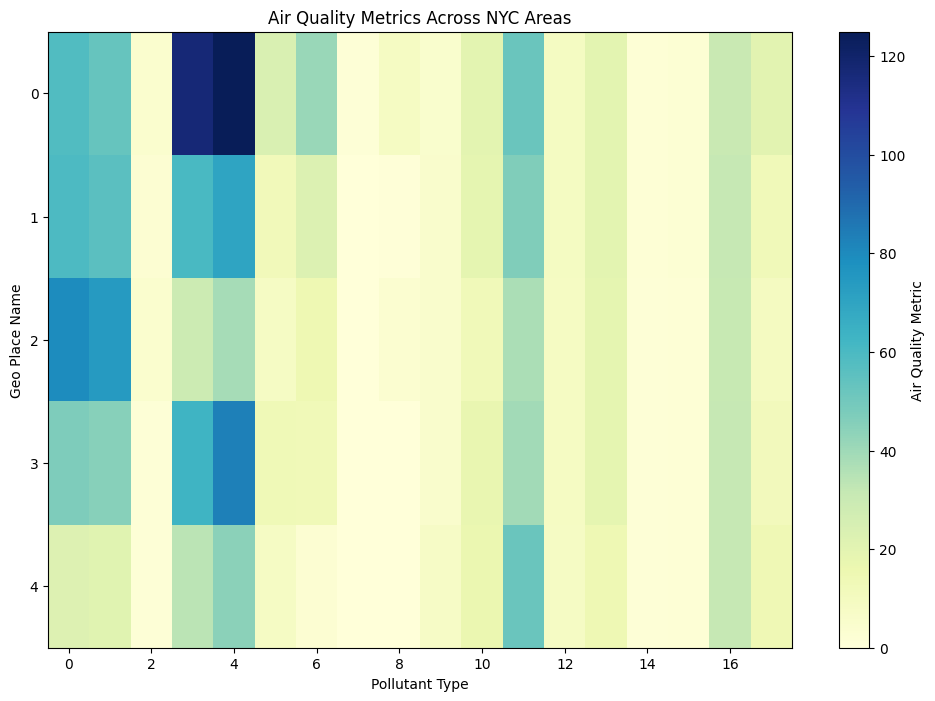

In [3]:
# 1. Heatmap for air quality concentrations by area using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(pivot_table, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Air Quality Metric')
plt.title('Air Quality Metrics Across NYC Areas')
plt.xlabel('Pollutant Type')
plt.ylabel('Geo Place Name')
plt.show()

# **Instruction for Interpreting the Bar Chart**
 This bar chart illustrates the average air quality metric (e.g., PM2.5 levels) across different tree health statuses in NYC.
 The x-axis represents the health status of the trees, such as "Good," "Fair," or "Poor."
 The y-axis shows the average air quality value associated with each tree health category.
 Each bar's height indicates the average concentration of the air quality metric for the respective tree health status.
 This visualization helps identify potential relationships between the condition of trees and air quality levels in the city.


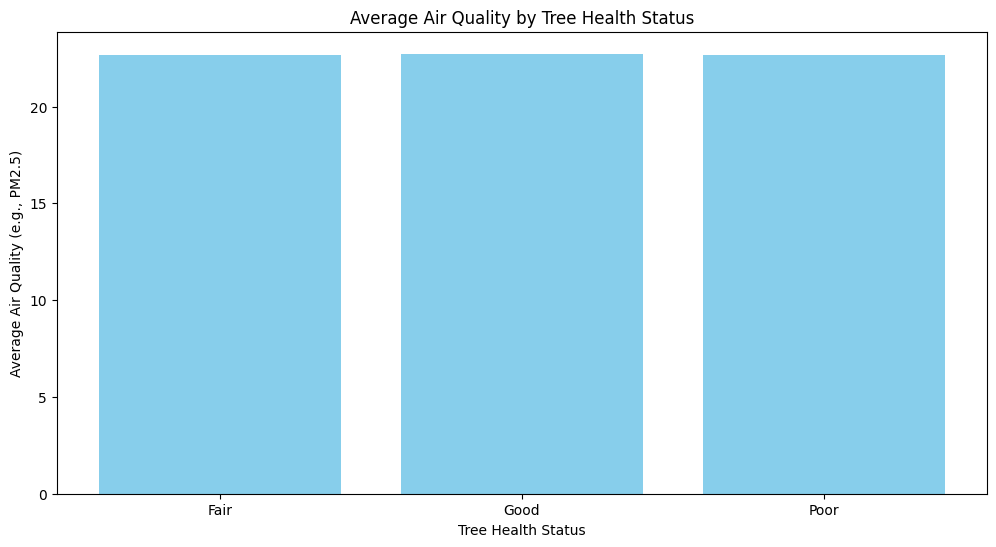

In [4]:
merged_data['Tree Health'] = merged_data['health']
avg_air_quality = merged_data.groupby('Tree Health')['Data Value'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(avg_air_quality['Tree Health'], avg_air_quality['Data Value'], color='skyblue')
plt.title('Average Air Quality by Tree Health Status')
plt.xlabel('Tree Health Status')
plt.ylabel('Average Air Quality (e.g., PM2.5)')
plt.show()

# **Instruction for Interpreting the Scatter Plot**
 This scatter plot visualizes the correlation between tree diameter (DBH) and air quality levels for different pollutants.
 The x-axis represents the diameter of trees (DBH), serving as an indicator of tree density or size, while the y-axis
 shows the measured values of various air quality metrics (e.g., concentrations of PM2.5, NO2, etc.).
 Each color-coded point on the plot corresponds to a specific type of pollutant, with transparency added to help visualize
 overlapping points. The plot allows for analyzing potential relationships between tree size and air quality, such as whether
 areas with larger trees have better or worse air quality. The grid helps in better visual alignment of points.

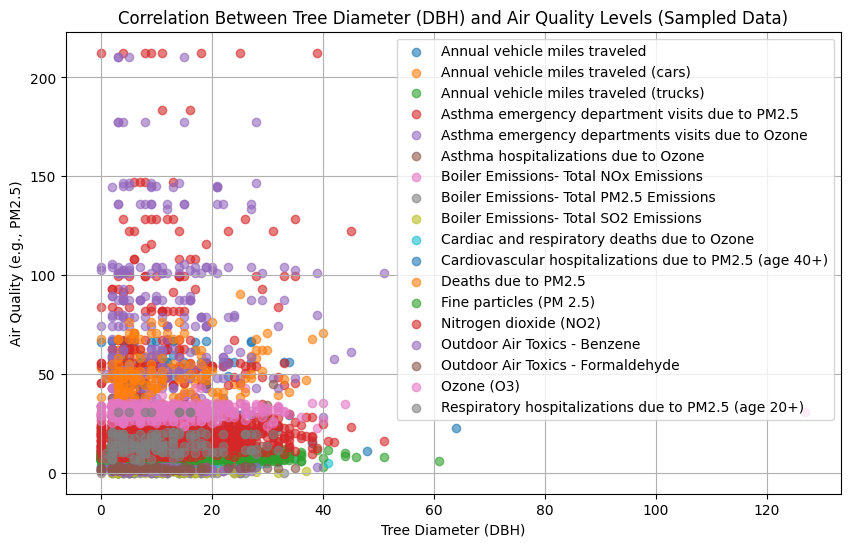

In [5]:

# 2. Scatter plot for correlation analysis using sampled data for faster visualization
sampled_data = merged_data.sample(n=5000, random_state=42)  # Adjust 'n' as needed for speed and visualization quality

plt.figure(figsize=(10, 6))
for name, group in sampled_data.groupby('Name'):
    plt.scatter(
        group['tree_dbh'],  # Using 'tree_dbh' as a measure for tree density
        group['Data Value'],
        label=name,
        alpha=0.6  # Added transparency for better visualization
    )
plt.title('Correlation Between Tree Diameter (DBH) and Air Quality Levels (Sampled Data)')
plt.xlabel('Tree Diameter (DBH)')
plt.ylabel('Air Quality (e.g., PM2.5)')
plt.legend()
plt.grid(True)  # Added grid for better readability
plt.show()
